
# Project: Patient Show-up Data Analysis 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I analysised the No-show appointments dataset and tried to analysis the relationship between Age, Gender, Appointment weekday and Showup.

In [1]:
# Use this cell to set up import statements for all of the packages that I
#   plan to use.
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




<a id='wrangling'></a>
## Data Wrangling


### Loading the data

In [2]:
# Load my data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
#create the summary report
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Variable Identification

In [4]:
#check if all the data types are proper
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#check missing value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# # Convert that dateformat which is in string to datetime64[ns]
# The day of the week with Monday=0, Sunday=6

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['Day_Scheduled'] = df['ScheduledDay'].dt.day
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month


df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['Day_appointed'] = df['AppointmentDay'].dt.day
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

In [7]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4


In [8]:
#Rename the columns which have incorrect spelling mistakes - this will helps us create columns in easy to understand way
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap':'Handicap', 'No-show' : 'NoShow'}, inplace = True)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4



### Data Cleaning 

In [9]:
# Check how many records with age < 0 and age > 100
df.query('Age < 0  | Age > 100').count()


PatientId            8
AppointmentID        8
Gender               8
ScheduledDay         8
AppointmentDay       8
Age                  8
Neighbourhood        8
Scholarship          8
Hypertension         8
Diabetes             8
Alcoholism           8
Handicap             8
SMS_received         8
NoShow               8
Day_Scheduled        8
weekday_Scheduled    8
Month_Scheduled      8
Day_appointed        8
weekday_appointed    8
Month_appointed      8
dtype: int64

In [10]:
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
PatientId            110519 non-null float64
AppointmentID        110519 non-null int64
Gender               110519 non-null object
ScheduledDay         110519 non-null datetime64[ns]
AppointmentDay       110519 non-null datetime64[ns]
Age                  110519 non-null int64
Neighbourhood        110519 non-null object
Scholarship          110519 non-null int64
Hypertension         110519 non-null int64
Diabetes             110519 non-null int64
Alcoholism           110519 non-null int64
Handicap             110519 non-null int64
SMS_received         110519 non-null int64
NoShow               110519 non-null object
Day_Scheduled        110519 non-null int64
weekday_Scheduled    110519 non-null int64
Month_Scheduled      110519 non-null int64
Day_appointed        110519 non-null int64
weekday_appointed    110519 non-null int64
Month_appointed      110519 non-null int64
dtypes

<a id='eda'></a>
## Exploratory Data Analysis


### 1.Is there any Gender difference in having a patient to be with status Show / No-Show?

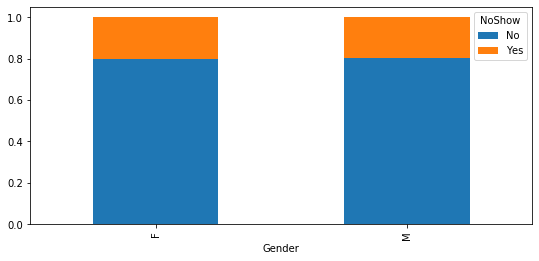

In [12]:
fig, ax = plt.subplots()
Gender=pd.crosstab(df['Gender'],df['NoShow'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax);

There is not much of difference with gender in having the status with Show/NoShow

### 2.Is there any Age difference in having a patient to be with status Show / No- Show?

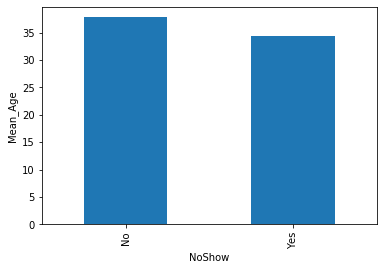

In [13]:
fig, ax = plt.subplots()
df.groupby('NoShow')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');

Customers who didn't show up are little older than people who showed up

### 3. Is there any Age difference along with Gender difference with the status of Show / NoShow?

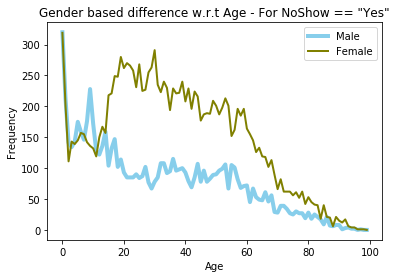

In [14]:

# Analysing the distribution among genders with their age whose status for NoShow is "Yes"
# i.e, they are NOT coming for the appointment.
range_df = pd.DataFrame()
range_df['Age'] = range(100) # Setting up for the age limit of 100 only
Male = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df.NoShow == 'Yes')]))
Female = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df.NoShow == 'Yes')]))

# multiple line plot
plt.plot( range_df, Male, markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot( range_df, Female, color='olive', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference w.r.t Age - For NoShow == "Yes"');

Female patients with Age group from 20 to 40 are NOT active in getting appointment with doctors when compared to similar age group of Males

### 4. On which weekday maximum appointments are getting finalized with Show status?

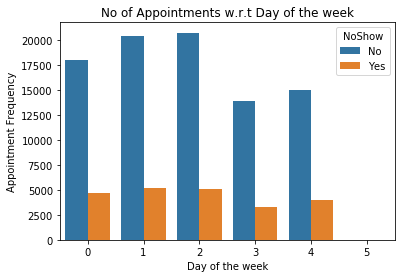

In [15]:
app_weekday = sns.countplot(x = 'weekday_appointed', hue = 'NoShow', data = df)
app_weekday.set_title('No of Appointments w.r.t Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Appointment Frequency')
plt.show()
#The day of the week with Monday=0, Sunday=6

Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends

<a id='conclusions'></a>
## Conclusions

**Findings and results:**

**1. There is not much difference with gender in having the status with Show/NoShow**

**2. Customers who didn't show up are a little older than people who showed up**

**3. Female patients with Age group from 20 to 40 are NOT active in getting appointment with doctors when compared to similar age group of Males**

**4. Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends
Limitations: The data contained only April, May and June data - If there are complete full year data on monthly basis, we can actually identify the traffic months for physicians appointments**



## Reference

https://github.com/kristenbee/appointment-no-show-exploration

https://github.com/AmmarJawad/No-show-Medical-Appointments_Kaggle-dataset